## P7.4.1
-----

In [ ]:
# So I can"t download the data so I"ll do this at a later date. :/

## P7.4.2
-----

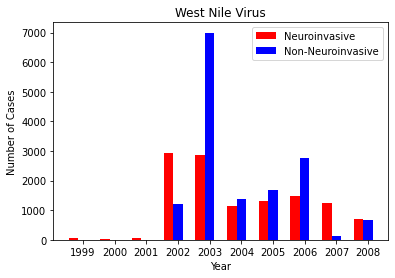

In [30]:
import numpy as np
import matplotlib.pyplot as plt

dtype = np.dtype([("year", "i4"), ("Neuroinvasive", "i4"), ("Non-Neuroinvasive", "i4")])

data = np.loadtxt(
    "C:/Users/Arjun Sarao/Learn-Scientific-Programming-with-Python-Solutions/LSPwP_accompanying_files/west-nile-virus.txt",
    dtype=dtype,
    delimiter=" ",
    skiprows=1,
)

years = data["year"]
neuroinvasive = data["Neuroinvasive"]
non_neuroinvasive = data["Non-Neuroinvasive"]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(years - 0.3, neuroinvasive, color="r", width=0.3, label="Neuroinvasive")
ax.bar(years, non_neuroinvasive, color="b", width=0.3, label="Non-Neuroinvasive")
ax.set_xlabel("Year")
ax.set_ylabel("Number of Cases")
ax.set_title("West Nile Virus")
ax.set_xticks(years)
plt.legend()
plt.show()


## P7.4.3
-----

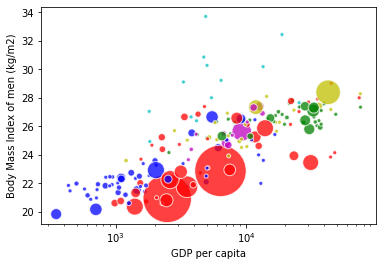

In [29]:
import numpy as np
import matplotlib.pyplot as plt


def read_data(file_path: str, data_type=float) -> dict():
    """
    Reads data from a file and returns a numpy array.
    """
    data = {}
    with open(file_path, "r") as f:
        for line in f:
            fields = line.split("/t")
            if len(fields) != 2:
                continue
            country, value = fields[0], fields[1].strip()
            if not value:
                continue
            data[country] = data_type(value)
    return data


gdp_filepath = "C:/Users/Arjun Sarao/Learn-Scientific-Programming-with-Python-Solutions/LSPwP_accompanying_files/gdp.tsv"
bmi_men_filepath = "C:/Users/Arjun Sarao/Learn-Scientific-Programming-with-Python-Solutions/LSPwP_accompanying_files/bmi_men.tsv"
population_total_filepath = "C:/Users/Arjun Sarao/Learn-Scientific-Programming-with-Python-Solutions/LSPwP_accompanying_files/population_total.tsv"
continent_filepath = "C:/Users/Arjun Sarao/Learn-Scientific-Programming-with-Python-Solutions/LSPwP_accompanying_files/continents.tsv"

raw_population = read_data(population_total_filepath)
raw_men_bmi = read_data(bmi_men_filepath)
raw_gdp = read_data(gdp_filepath)
continent = read_data(continent_filepath, str)

countries = (
    set(raw_population.keys())
    & set(raw_men_bmi.keys())
    & set(raw_gdp.keys())
    & set(continent.keys())
)
countries = sorted(list(countries))

population = np.array([raw_population[country] for country in countries])
bmi_men = np.array([raw_men_bmi[country] for country in countries])
gdp = np.array([raw_gdp[country] for country in countries])

continent_colours = {
    "Africa": "b",
    "Asia": "r",
    "North America": "y",
    "South America": "m",
    "Europe": "g",
    "Oceania": "c",
}
colours = [continent_colours[continent[country]] for country in countries]

sizes = np.clip(population / 1.0e9 * 2000, 16, None)

fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(gdp, bmi_men, s=sizes, c=colours, edgecolors="w")

scatter.set_alpha(0.75)

ax.set_xscale("log")
ax.set_xlabel("GDP per capita")
ax.set_ylabel("Body Mass Index of men (kg/m2)")

plt.show()


## P7.4.4
-----

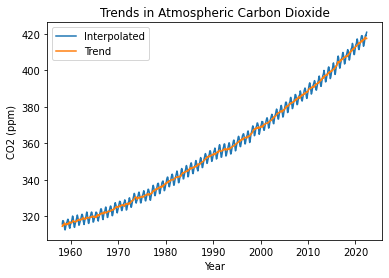

In [56]:
import numpy as np
import matplotlib.pyplot as plt

dtype = np.dtype([("Year", "f8"), ("co2_ppm", "f8"), ("co2_ppm_trend", "f8")])

data = np.loadtxt("C:/Users/Arjun Sarao/Learn-Scientific-Programming-with-Python-Solutions/LSPwP_accompanying_files/co2_mm_mlo.txt",usecols=(2, 3, 4), dtype=dtype, skiprows=53)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(data["Year"], data["co2_ppm"], label="Interpolated")
ax.plot(data["Year"], data["co2_ppm_trend"], label="Trend")
ax.set_title("Trends in Atmospheric Carbon Dioxide")
ax.set_xlabel("Year")
ax.set_ylabel("CO2 (ppm)")
plt.legend()
plt.show()

## P7.4.5
-----

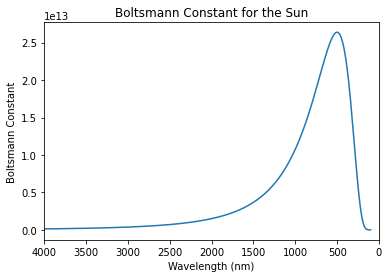

In [63]:
import numpy as np
import matplotlib.pyplot as plt

wavelengths = np.linspace(100, 5000, 10_000)

h, c, k_B = 6.62606957e-34, 299792458, 1.3806488e-23
T = 5778

B = (
    2
    * h
    * c**2
    / (wavelengths * 1.0e-9) ** 5
    / (np.exp(h * c / wavelengths / 1.0e-9 / k_B / T) - 1)
)

plt.plot(wavelengths, B)
plt.xlim(4000, 0)
plt.xlabel("Wavelength (nm)")
plt.ylabel("Boltsmann Constant")
plt.title("Boltsmann Constant for the Sun")
plt.show()


## P7.4.6
-----

In [ ]:
# Nah